### Image Augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img


In [3]:
def generate_augmented_images(img_name):
    datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
    

    img = load_img(img_name) 
    x = img_to_array(img)
    x = x.reshape((1, ) + x.shape)  
    i = 0
    for batch in datagen.flow(x, batch_size = 1,
                            save_to_dir ='preview', 
                            save_prefix ='image', save_format ='jpeg'):
        i += 1
        if i > 5:
            break

In [6]:
generate_augmented_images("fake1.jpeg")
generate_augmented_images("fake2.jpeg")
generate_augmented_images("fake3.jpeg")
generate_augmented_images("fake4.jpeg")
generate_augmented_images("fake5.jpeg")
generate_augmented_images("fake6.jpeg")


In [7]:
generate_augmented_images("real1.jpg")
generate_augmented_images("real2.jpg")
generate_augmented_images("real3.jpg")
generate_augmented_images("real5.jpg")
generate_augmented_images("real6.jpg")
generate_augmented_images("2.jpg")
generate_augmented_images("27.jpg")
generate_augmented_images("91.jpg")

### Exploratory Data Analysis

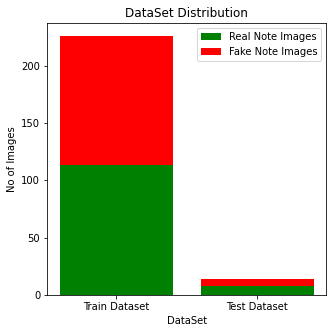

In [4]:
import os
import matplotlib.pyplot as plt
n_train = len(os.listdir("dataset/train/real")) + len(os.listdir("dataset/train/fake"))
n_test = len(os.listdir("dataset/test/real")) + len(os.listdir("dataset/test/fake"))
n_train_fake = len(os.listdir("dataset/train/fake"))
n_train_real = n_train - n_train_fake
n_test_fake = len(os.listdir("dataset/test/fake"))
n_test_real = n_test - n_test_fake


plt.figure(figsize=(5,5))
x = ["Train Dataset", "Test Dataset"]
y1 = [n_train_real, n_test_real]
y2 = [n_train_real, n_test_fake]
plt.bar(x,y1,color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.xlabel("DataSet")
plt.ylabel("No of Images")
plt.legend(["Real Note Images", "Fake Note Images"])
plt.title("DataSet Distribution")
plt.show()

In [5]:
import cv2
def getDimensions(path1,path2):
    res = [cv2.imread(path1+x).shape for x in os.listdir(path1)] + [cv2.imread(path2+x).shape for x in os.listdir(path2)]
    return [x[0] for x in res], [x[1] for x in res]

heights, widhts = getDimensions("dataset/train/real/","dataset/train/fake/")

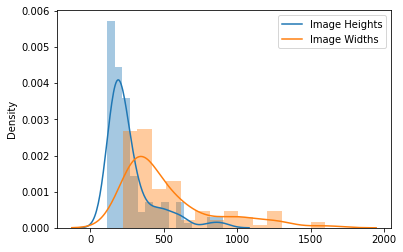

In [6]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.distplot(heights)
sns.distplot(widhts)
plt.legend(["Image Heights","Image Widths"])
plt.show()

### Model Building

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import cv2

In [3]:
input_shape = (500,500,3)

In [4]:
inputs = Input(shape=input_shape)
y = Conv2D(filters=8,kernel_size=(3,3),activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=16,kernel_size=(3,3),activation='relu')(y)
y = MaxPooling2D()(y)
y = Dropout(0.1)(y) 
y = Flatten()(y)
outputs = Dense(1, activation='sigmoid')(y)

In [5]:
model = Model(inputs=inputs, outputs=outputs)

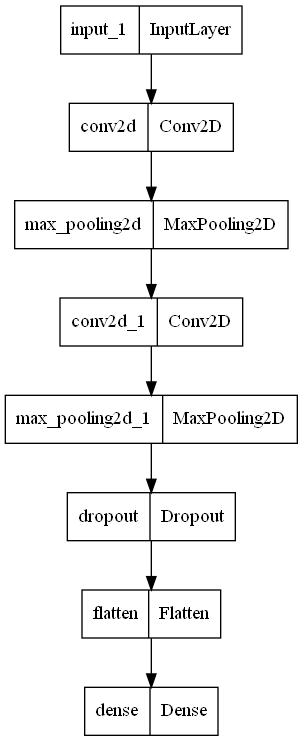

In [12]:
tf.keras.utils.plot_model(model)

In [7]:
import pathlib
train_data_dir = pathlib.Path('dataset/train')
test_data_dir = pathlib.Path('dataset/test')

In [8]:
batch_size = 16
img_height = 500
img_width = 500

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  labels="inferred",
  label_mode = 'int',
  image_size=(img_height, img_width),
  batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  labels="inferred",
  label_mode = 'int',
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 218 files belonging to 2 classes.
Found 15 files belonging to 2 classes.


In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


In [16]:
hist = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
14/14 [==============================] - 10s 653ms/step - loss: 4543.1421 - accuracy: 0.6101 - val_loss: 313.3554 - val_accuracy: 0.5333
Epoch 2/10
14/14 [==============================] - 9s 653ms/step - loss: 770.7637 - accuracy: 0.5229 - val_loss: 538.4339 - val_accuracy: 0.5333
Epoch 3/10
14/14 [==============================] - 9s 643ms/step - loss: 66.2468 - accuracy: 0.6606 - val_loss: 10.8782 - val_accuracy: 0.6667
Epoch 4/10
14/14 [==============================] - 9s 647ms/step - loss: 1.3383 - accuracy: 0.8486 - val_loss: 0.8165 - val_accuracy: 0.8000
Epoch 5/10
14/14 [==============================] - 9s 642ms/step - loss: 0.1269 - accuracy: 0.9495 - val_loss: 1.7212 - val_accuracy: 0.8000
Epoch 6/10
14/14 [==============================] - 9s 647ms/step - loss: 0.0416 - accuracy: 0.9862 - val_loss: 2.2077 - val_accuracy: 0.7333
Epoch 7/10
14/14 [==============================] - 9s 646ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 2.4437 - val_accuracy: 0

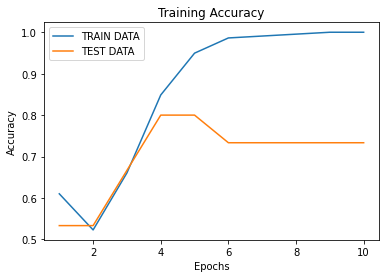

In [18]:
plt.plot(range(1,11),hist.history['accuracy'],label="TRAIN DATA")
plt.plot(range(1,11),hist.history['val_accuracy'],label="TEST DATA")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.show()

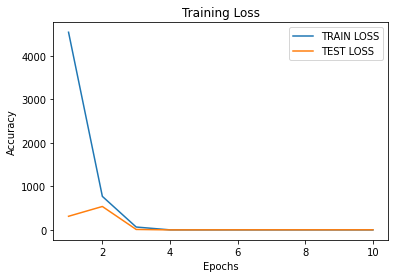

In [19]:
plt.plot(range(1,11),hist.history['loss'],label="TRAIN LOSS")
plt.plot(range(1,11),hist.history['val_loss'],label="TEST LOSS")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Loss")
plt.legend()
plt.show()

### Testing

In [20]:
def predict_image(file_name):
    img = cv2.imread(file_name)
    img = cv2.resize(img,(500,500))
    pred = model.predict(np.array([img]))[0][0]
    res = "Real Note" if pred == 1 else "Fake Note"
    plt.imshow(plt.imread(file_name))
    print(res)

Fake Note


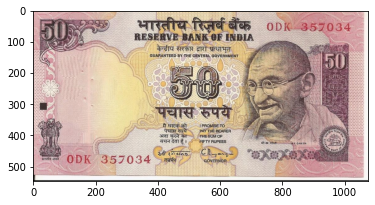

In [11]:
predict_image("fake4.jpeg")

Real Note


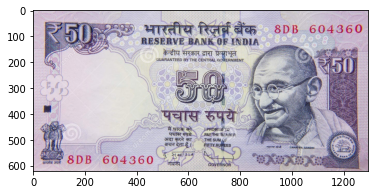

In [33]:
predict_image("real6.jpg")


Fake Note


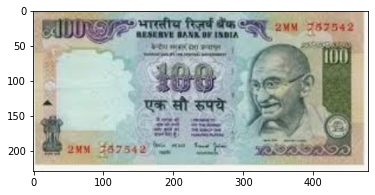

In [21]:
predict_image("1.jpeg")

Fake Note


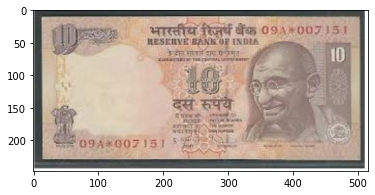

In [22]:
predict_image("2.jpeg")

Fake Note


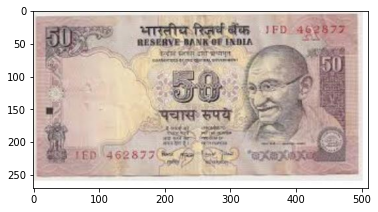

In [23]:

predict_image("3.jpeg")


Real Note


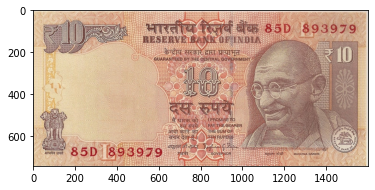

In [39]:

predict_image("4.jpg")


Fake Note


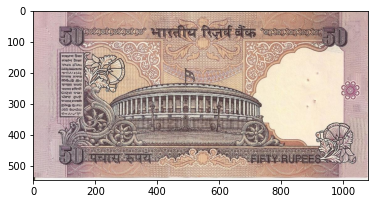

In [38]:

predict_image("8.jpeg")


Real Note


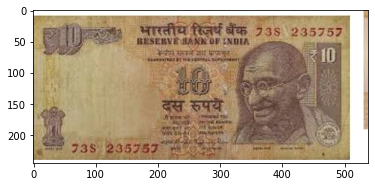

In [35]:

predict_image("6.jpeg")

Real Note


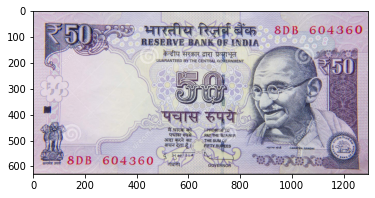

In [37]:

predict_image("7.jpg")

## Saving the Model and Test Inference Pipeline

In [22]:
model.save("./saved_model/v1.0")

INFO:tensorflow:Assets written to: ./saved_model/v1.0\assets


1/1 [==============================] - 1s 687ms/step
1.jpeg  ->  Fake Note


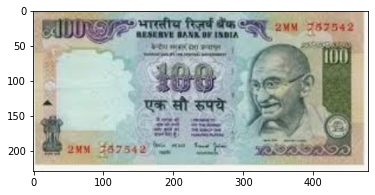

1/1 [==============================] - 0s 165ms/step
2.jpeg  ->  Fake Note


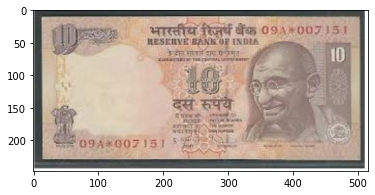

1/1 [==============================] - 0s 164ms/step
3.jpeg  ->  Fake Note


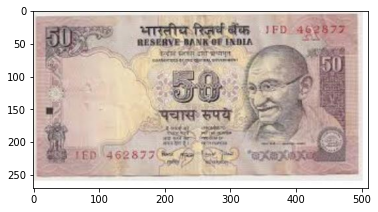

1/1 [==============================] - 0s 180ms/step
4.jpg  ->  Real Note


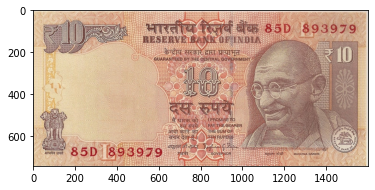

1/1 [==============================] - 0s 156ms/step
5.jpeg  ->  Fake Note


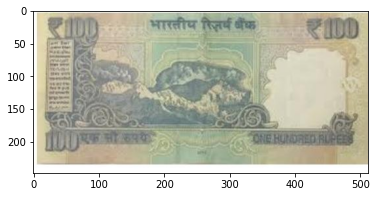

1/1 [==============================] - 0s 162ms/step
9.jpeg  ->  Fake Note


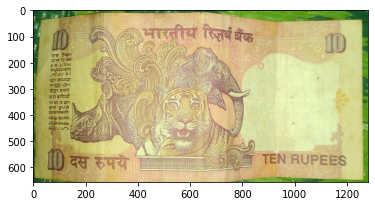

1/1 [==============================] - 0s 168ms/step
10.jpeg  ->  Fake Note


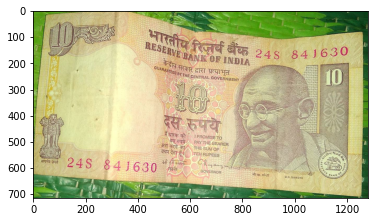

1/1 [==============================] - 0s 156ms/step
12.jpeg  ->  Fake Note


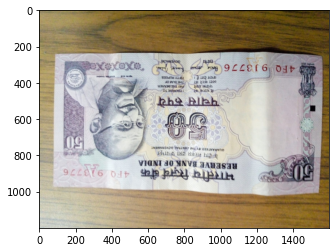

1/1 [==============================] - 0s 166ms/step
13.jpg  ->  Real Note


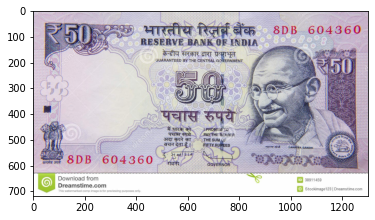

1/1 [==============================] - 0s 304ms/step
11.jpg  ->  Fake Note


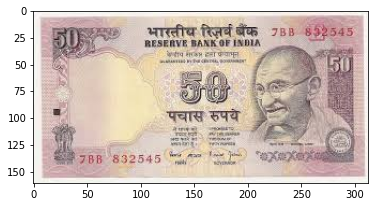

1/1 [==============================] - 0s 159ms/step
6.jpeg  ->  Fake Note


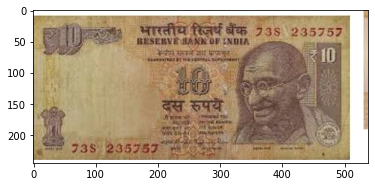

1/1 [==============================] - 0s 185ms/step
7.jpg  ->  Fake Note


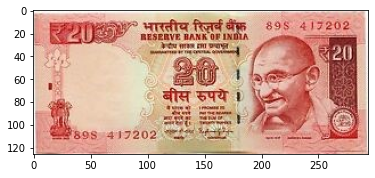

1/1 [==============================] - 0s 191ms/step
8.jpeg  ->  Fake Note


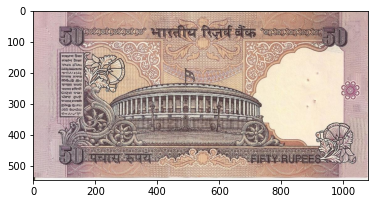

In [14]:
from final_inference_pipeline import FinalInference

loaded_model = FinalInference("./saved_model/v1.0")
for img in ["1.jpeg","2.jpeg","3.jpeg","4.jpg","5.jpeg","9.jpeg","10.jpeg","12.jpeg","13.jpg","11.jpg","6.jpeg","7.jpg","8.jpeg"]:
    res = loaded_model.predict_counterfiet_note(img)
    print(img," -> ",res)
    plt.imshow(plt.imread(img))
    plt.show()
   